[Link to the Sephora Dataset
](https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews/data)


## Make connections and load data

In [1]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Connect Kaggle
!mkdir ~/.kaggle
!cp #[insert the location of your kaggle api key]
!chmod 600 ~/.kaggle/kaggle.json

# dataset download
!kaggle datasets download -d nadyinky/sephora-products-and-skincare-reviews

# Unzip file
!unzip /content/sephora-products-and-skincare-reviews.zip

### Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# table paths
product_path = '/content/product_info.csv'
review_250path = '/content/reviews_0-250.csv'
review_1250endpath = '/content/reviews_1250-end.csv'
review_250_500path = '/content/reviews_250-500.csv'
review_500_750path ='/content/reviews_500-750.csv'
review_750_1250path = '/content/reviews_750-1250.csv'

In [6]:
# read csv
product_df = pd.read_csv(product_path)
review_250df = pd.read_csv(review_250path,  dtype={1: str })
review_1250enddf = pd.read_csv(review_1250endpath, dtype={1: str })
review_250_500df = pd.read_csv(review_250_500path, dtype={1: str })
review_500_750df = pd.read_csv(review_500_750path, dtype={1: str })
review_750_1250df = pd.read_csv(review_750_1250path, dtype={1: str })

*Note: reviews 0-250: reviews of 250 products are collected*

In [7]:
# view head of product_df
product_df.shape

(8494, 27)

*Note: The review tables only show reviews for **skin care** products, therefore we want to drop or eliminate poroducts that do not belong to this category.*

In [8]:
# look at the first 5 rows
review_1250enddf.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1945004256,5,1.0,0.000000,2,2,0,2022-12-10,I absolutely L-O-V-E this oil. I have acne pro...,A must have!,lightMedium,green,combination,NaN,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
1,1,5478482359,3,1.0,0.333333,3,2,1,2021-12-17,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
2,2,29002209922,5,1.0,1.000000,2,0,2,2021-06-07,Works well as soon as I wash my face and pat d...,Worth the money!,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
3,3,7391078463,5,1.0,1.000000,2,0,2,2021-05-21,"this oil helped with hydration and breakouts, ...",best face oil,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
4,4,1766313888,5,1.0,1.000000,13,0,13,2021-03-29,This is my first product review ever so that s...,Maskne miracle,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0


In [9]:
# drop unecessary columns to our skincare investigation
cols_to_drop = ['Unnamed: 0','hair_color','eye_color','skin_tone']
review_250df.drop(cols_to_drop, axis=1, inplace=True)
review_1250enddf.drop(cols_to_drop, axis=1, inplace=True)
review_250_500df.drop(cols_to_drop, axis=1, inplace=True)
review_500_750df.drop(cols_to_drop, axis=1, inplace=True)
review_750_1250df.drop(cols_to_drop, axis=1, inplace=True)


In [10]:
print('Review tables shape:')
print(review_250df.shape)
print(review_1250enddf.shape)
print(review_250_500df.shape)
print(review_500_750df.shape)
print(review_750_1250df.shape)

Review tables shape:
(602130, 15)
(49977, 15)
(206725, 15)
(116262, 15)
(119317, 15)


In [11]:
# look at the first 5 rows
review_250df.head()

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_type,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,dry,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,dry,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,combination,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,combination,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


# Exploratory Data Analysis

Take a look at the product category present in product_df dataframe, we are only interested in skincare product. Therefore, it would be beneficial to remove those that are not in our desired category.

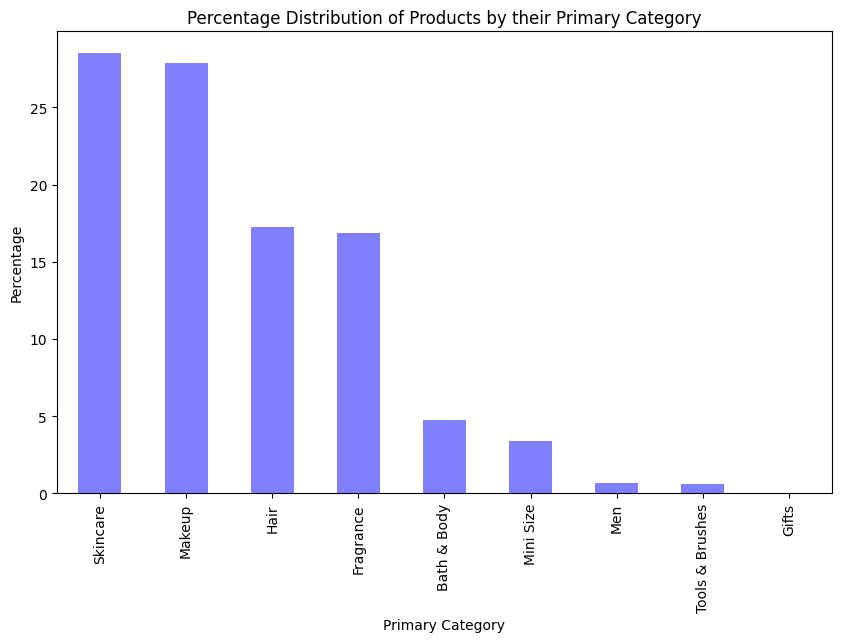

In [12]:
# bar plot of products in dataframe
counts = product_df['primary_category'].value_counts()
percentages = (counts / counts.sum())*100

plt.figure(figsize=(10, 6))
percentages.plot(kind='bar', title='Percentage Distribution of Products by their Primary Category',color='blue',alpha=.5)
plt.ylabel('Percentage')
plt.xlabel('Primary Category')
plt.show()

It is good to see that the majority of products present are skincare, now we will go ahead and remove all the other categories.

In [13]:
# drop all rows that are not skincare as primary category
product_df= product_df[product_df['primary_category']=='Skincare']
print(product_df.shape)

(2420, 27)


In [14]:
# observe columns after isolation
product_df.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [15]:
# change name of column reviews
product_df.rename(columns={'reviews':'num_reviews',
                          'price_usd':'original_price_usd',
                           'rating':'average_rating'}, inplace=True)

<ipython-input-15-8fad8f2edc84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df.rename(columns={'reviews':'num_reviews',


The 'wellness', 'high tech tools' and 'self tanners', secondary category of products is not within the scope of our current investigation. This category includes items like supplements and tools such as rollers. Our primary research and analysis are centered on products like creams, serums, toners, etc., which are chemically formulated to be applied to the face and address specific skincare concerns over time. As a result, we won't be conducting an in-depth examination of the 'wellness','high tech tools', and 'self tanners' categories at this time.

In [16]:
# drop rows in secondary category products_df we wont be using
values_to_drop = ['Self Tanners','High Tech Tools','Wellness','Shop by Concern','Mini Size','Value & Gift Sets']
product_df = product_df[~product_df['secondary_category'].isin(values_to_drop)]

Combining similar categories may enhance the clarity of analysis and visualization. "Lip Balms & Treatments" are typically regarded as forms of treatment, and its differentiation from the "Treatments" category does not substantially impact the analysis, grouping them together could be beneficial.

In [17]:
# combining treatments
categories_to_rename = ['Treatments', 'Lip Balms & Treatments']
product_df['secondary_category'] = product_df['secondary_category'].replace(categories_to_rename, 'Treatments & Serums')

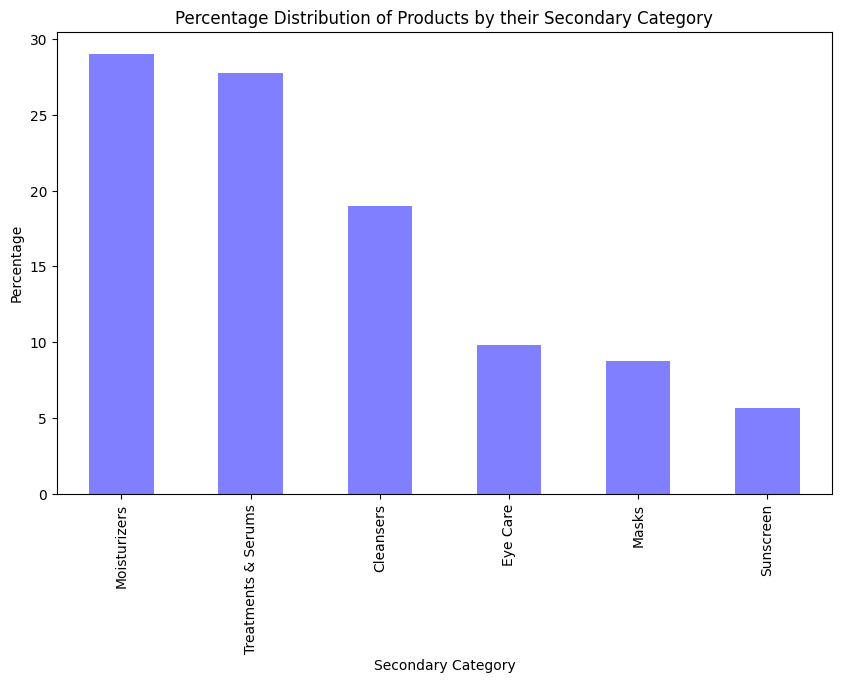

In [18]:
# secondary category of product distribution
counts = product_df['secondary_category'].value_counts()
percentages = (counts / counts.sum())*100

plt.figure(figsize=(10, 6))
percentages.plot(kind='bar', title='Percentage Distribution of Products by their Secondary Category',color='blue',alpha=.5)
plt.ylabel('Percentage')
plt.xlabel('Secondary Category')
plt.show()

In [19]:
# drop rows in tertiary category products_df we wont be using
values_to_drop = ['Facial Rollers','BB & CC Creams','Face Wipes','Makeup Removers','Holistic Wellness', 'Teeth Whitening','Blotting Papers','Hair Removal','Beauty Supplements']
product_df = product_df[~product_df['tertiary_category'].isin(values_to_drop)]

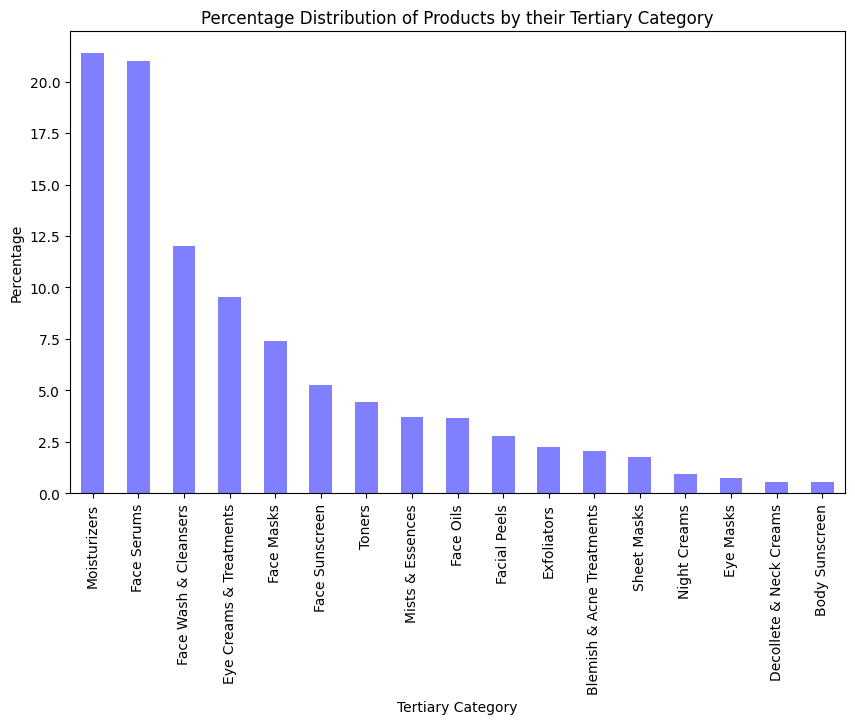

In [20]:
# tertiary category of product distribution
counts = product_df['tertiary_category'].value_counts()
percentages = (counts / counts.sum())*100

plt.figure(figsize=(10, 6))
percentages.plot(kind='bar', title='Percentage Distribution of Products by their Tertiary Category',color='blue',alpha=.5)
plt.ylabel('Percentage')
plt.xlabel('Tertiary Category')
plt.show()

*Note: While products may be marketed for specific areas of the body, it's important to note that they often contain ingredients that address broader skincare concerns.*

In [21]:
# check duplicated in products table -> product ids
duplicated_products = product_df[product_df.duplicated(['product_id'])]
duplicated_products

,product_id,product_name,brand_id,brand_name,loves_count,average_rating,num_reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price


In [22]:
# missing values on products table
sum_na = product_df.isna().sum()
percent_missing = sum_na/len(product_df)*100
percent_missing.sort_values(ascending=False)

value_price_usd       99.413333
variation_desc        99.360000
sale_price_usd        98.613333
child_max_price       81.706667
child_min_price       81.706667
highlights            16.746667
variation_value        6.026667
variation_type         4.533333
tertiary_category      3.626667
size                   3.146667
average_rating         1.920000
num_reviews            1.920000
ingredients            1.706667
sephora_exclusive      0.000000
brand_id               0.000000
child_count            0.000000
secondary_category     0.000000
primary_category       0.000000
new                    0.000000
out_of_stock           0.000000
online_only            0.000000
limited_edition        0.000000
brand_name             0.000000
product_name           0.000000
original_price_usd     0.000000
loves_count            0.000000
product_id             0.000000
dtype: float64

In [23]:
product_df['product_id'].nunique()

1875

In [24]:
# Concatenate all review DataFrames vertically
all_reviews = pd.concat([review_250df, review_1250enddf, review_250_500df, review_500_750df, review_750_1250df], ignore_index=True)

In [25]:
# get rid of products with no ingredients
product_df = product_df[product_df['ingredients'].notna()]

In [26]:
# missing values on review table
sum_na = all_reviews.isna().sum()
percent_missing = sum_na/len(all_reviews)*100
percent_missing.sort_values(ascending=False)

helpfulness                 51.314543
review_title                28.385497
is_recommended              15.349626
skin_type                   10.193337
review_text                  0.131943
author_id                    0.000000
rating                       0.000000
total_feedback_count         0.000000
total_neg_feedback_count     0.000000
total_pos_feedback_count     0.000000
submission_time              0.000000
product_id                   0.000000
product_name                 0.000000
brand_name                   0.000000
price_usd                    0.000000
dtype: float64

In [27]:
# impute skin_type by most common
mode_skin_type = all_reviews['skin_type'].mode()[0]  # Get the most common skin_type value
all_reviews['skin_type'].fillna(mode_skin_type, inplace=True)

# Check if all missing skin_type values have been imputed
missing_skin_type_count = all_reviews['skin_type'].isnull().sum()
print(f"Number of missing skin_type values after imputation: {missing_skin_type_count}")

Number of missing skin_type values after imputation: 0


In [28]:
print(f'Shape of Concatenated Reviews Dataframe: {all_reviews.shape}\nFirst 5 rows:')
all_reviews.head()

Shape of Concatenated Reviews Dataframe: (1094411, 15)
First 5 rows:


,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_type,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,dry,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,combination,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,dry,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,combination,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,combination,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [29]:
# renaming of columns to prevent overlap with purchase
all_reviews.rename(columns={'price_usd':'purchase_price_usd',
                           'rating':'author_rating'}, inplace=True)

In [30]:
# merge product table and review table
cols_join = ['product_id','product_name','brand_name']
merged_df = pd.merge(product_df, all_reviews, on=cols_join, how='inner')

We will perform an **INNER JOIN** to retain only those products that have received reviews. The reviews table contains more reviewed products than the total number of products in our products table. Initially, I filtered products from the products table based on their secondary and tertiary categories to identify those relevant to skincare for our analysis. Consequently, there is a possibility that we have reviews on the reviews table for products that do not fall within the scope of our skincare investigation.


In [31]:
# new shape of merged tables
print(f'Shape of Merged Product and Review Table:\n{merged_df.shape}\nColumn names:')
merged_df.columns

Shape of Merged Product and Review Table:
(930452, 39)
Column names:


Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'average_rating', 'num_reviews', 'size', 'variation_type',
       'variation_value', 'variation_desc', 'ingredients',
       'original_price_usd', 'value_price_usd', 'sale_price_usd',
       'limited_edition', 'new', 'online_only', 'out_of_stock',
       'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price', 'author_id', 'author_rating',
       'is_recommended', 'helpfulness', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count',
       'submission_time', 'review_text', 'review_title', 'skin_type',
       'purchase_price_usd'],
      dtype='object')

In [32]:
# remove duplicates
# those authors who have reviews the same product more than once
print(merged_df.duplicated(subset=['author_id', 'product_id']).sum())
merged_df = merged_df.drop_duplicates(subset=['author_id', 'product_id'])

4791


In [33]:
# missing values on review table
sum_na = merged_df.isna().sum()
percent_missing = sum_na/len(merged_df)*100
percent_missing.sort_values(ascending=False)

variation_desc              99.127002
sale_price_usd              99.010869
value_price_usd             97.572653
child_max_price             55.501420
child_min_price             55.501420
helpfulness                 52.066793
review_title                28.408348
is_recommended              15.442478
highlights                  10.713749
tertiary_category            6.616461
variation_value              4.156813
variation_type               3.468008
size                         2.541211
review_text                  0.129745
author_id                    0.000000
author_rating                0.000000
product_id                   0.000000
total_neg_feedback_count     0.000000
total_feedback_count         0.000000
total_pos_feedback_count     0.000000
submission_time              0.000000
skin_type                    0.000000
child_count                  0.000000
sephora_exclusive            0.000000
secondary_category           0.000000
primary_category             0.000000
product_name

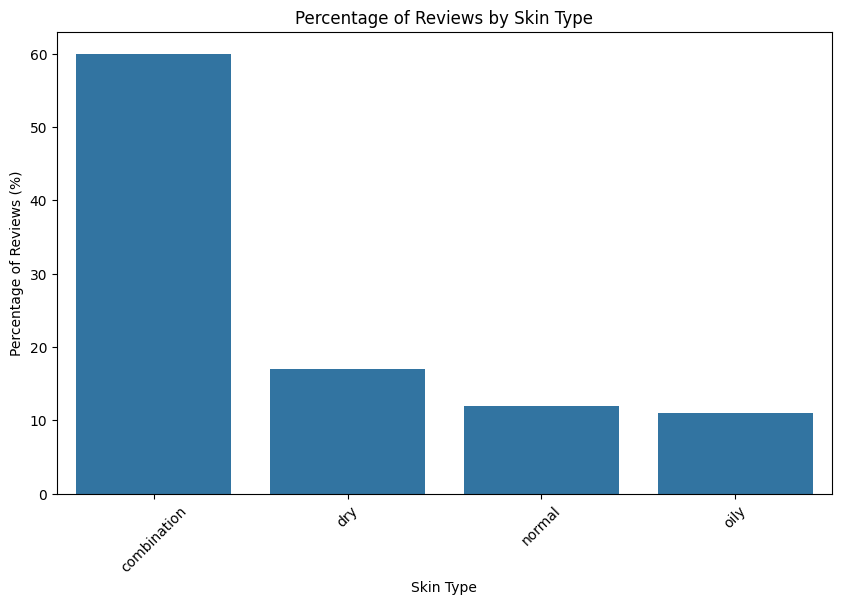

In [34]:
# Calculate the total number of reviews
total_reviews = len(merged_df)

# Calculate the percentage of reviews for each skin type
skin_type_counts = merged_df['skin_type'].value_counts()
skin_type_percentage = (skin_type_counts / total_reviews) * 100

# Plot the percentage of reviews by skin type
plt.figure(figsize=(10, 6))
sns.barplot(x=skin_type_percentage.index, y=skin_type_percentage.values)
plt.title('Percentage of Reviews by Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Percentage of Reviews (%)')
plt.xticks(rotation=45)
plt.show()

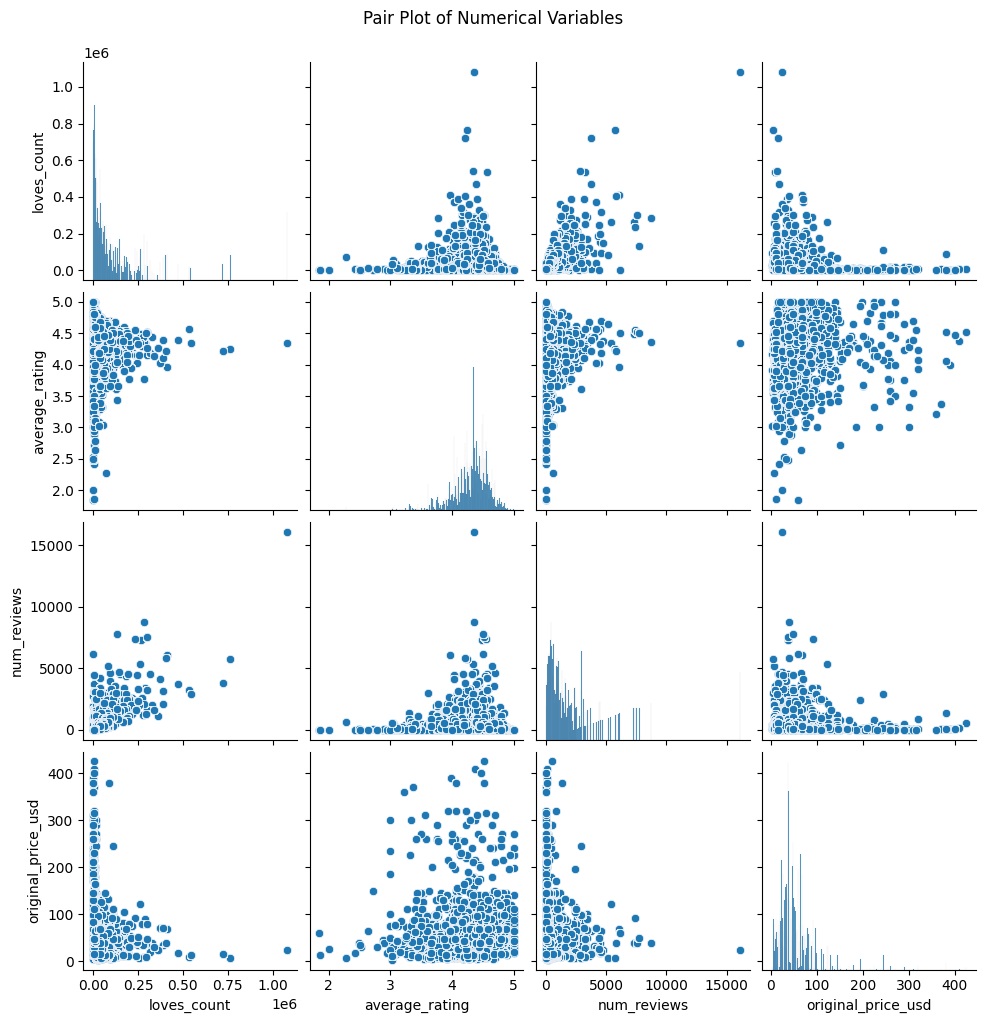

In [35]:
numerical_cols = ['loves_count', 'average_rating', 'num_reviews', 'original_price_usd']


# Pair Plots
pair_plot = sns.pairplot(merged_df[numerical_cols])
pair_plot.fig.suptitle('Pair Plot of Numerical Variables', y=1.02)  # Adjust y position to prevent overlap
plt.show()


In [36]:
for i in range(20):
  print(i,np.sum(merged_df['author_id'].value_counts() > i))

0 472401
1 166535
2 83319
3 48217
4 30645
5 20617
6 14697
7 10919
8 8463
9 6827
10 5584
11 4724
12 4082
13 3570
14 3153
15 2830
16 2562
17 2346
18 2134
19 1974


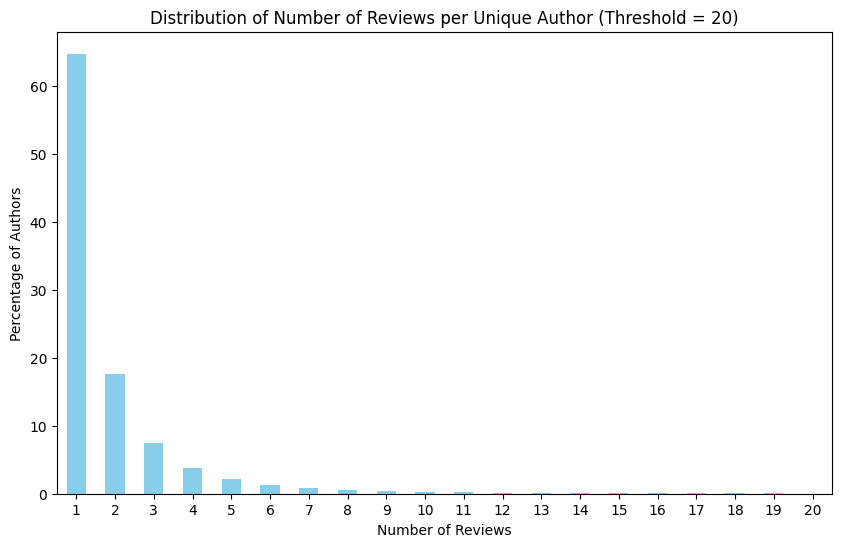

In [37]:
# Define the upper threshold
upper_threshold = 20

# Calculate the count of reviews per unique author
author_review_counts = merged_df['author_id'].value_counts()

# Filter out authors with more than the upper threshold
author_review_counts_filtered = author_review_counts[author_review_counts <= upper_threshold]

# Calculate percentages
total_authors = len(merged_df['author_id'].unique())
percentages = (author_review_counts_filtered.value_counts() / total_authors) * 100

# Plot the histogram or bar plot
plt.figure(figsize=(10, 6))
percentages.plot(kind='bar', color='skyblue')
plt.title(f'Distribution of Number of Reviews per Unique Author (Threshold = {upper_threshold})')
plt.xlabel('Number of Reviews')
plt.ylabel('Percentage of Authors')
plt.xticks(rotation=0)
plt.show()


In [38]:
reviews_count = merged_df['author_id'].value_counts()
users_with_five_reviews = reviews_count[reviews_count == 5].index.tolist()

# Filter for users with exactly five reviews
five_reviews_df = merged_df[merged_df['author_id'].isin(users_with_five_reviews)]
five_reviews_count = len(five_reviews_df['author_id'].unique())
print("Number of users with exactly five reviews:", five_reviews_count)

Number of users with exactly five reviews: 10028


In [39]:
five_reviews_df.shape

(50140, 39)

In [40]:
five_reviews_df.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'average_rating', 'num_reviews', 'size', 'variation_type',
       'variation_value', 'variation_desc', 'ingredients',
       'original_price_usd', 'value_price_usd', 'sale_price_usd',
       'limited_edition', 'new', 'online_only', 'out_of_stock',
       'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price', 'author_id', 'author_rating',
       'is_recommended', 'helpfulness', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count',
       'submission_time', 'review_text', 'review_title', 'skin_type',
       'purchase_price_usd'],
      dtype='object')

# User-based Collaborative Filtering

Distance metrics that measure the similarity between any two pairs of users

In [41]:
from sklearn.metrics.pairwise import cosine_similarity

In [42]:
# Remove users whose IDs start with 'orderGen'
five_reviews_df = five_reviews_df[~five_reviews_df['author_id'].str.startswith('orderGen')]
five_reviews_df = five_reviews_df[~five_reviews_df['author_id'].str.startswith('dummyUser')]

In [43]:
five_reviews_df['author_id'] = five_reviews_df['author_id'].astype('int64')
five_reviews_df['product_id'] = five_reviews_df['product_id'].str.replace('P', '').astype('int64')

In [44]:
# product_id = 480612
# product_name = product_name_dict.get(product_id)
# if product_name:
#     print(f"The product name for ID {product_id} is: {product_name}")
# else:
#     print(f"No product found for ID {product_id}")


## User-based Collaborative Filtering

In [45]:
# Step 1: Data Preparation
col = ['author_id', 'product_name','product_id','author_rating', 'secondary_category','skin_type','ingredients']
data = five_reviews_df[col].copy()

df_sorted = data.sort_values(by='author_id')

#df_sorted.to_csv('df_sorted.csv', index=False)

In [46]:

# Keep a dictionary of the product ids and product names
product_name_dict = {}
for index, row in five_reviews_df.iterrows():
    product_id = row['product_id']
    product_name = row['product_name']
    product_name_dict[product_id] = product_name

# Step 2: Create User-Item Matrix
user_item_matrix = df_sorted.pivot_table(index='author_id', columns='product_id', values='author_rating', fill_value=0)

# Step 3: Calculate User Similarity
user_similarity = cosine_similarity(user_item_matrix)

# Step 4: Make Recommendations
def recommend_products(user_id, user_item_matrix, user_similarity):
    user_index = user_item_matrix.index.get_loc(user_id)
    similar_users = user_similarity[user_index]
    similar_users[user_index] = 0
    user_ratings = user_item_matrix.loc[user_id]
    similar_users_indices = similar_users > 0.5
    similar_users_ratings = user_item_matrix[similar_users_indices].mean(axis=0)
    recommendations = similar_users_ratings[user_ratings == 0]
    recommendations = recommendations.sort_values(ascending=False)
    # Fetch product names
    recommendations_with_names = [(product_name_dict[product_id], score) for product_id, score in recommendations.items()]

    return recommendations_with_names

# Loop through unique secondary categories and generate recommendations

user_id = 7643544568
recommendations = recommend_products(user_id, user_item_matrix, user_similarity)
print("Recommended products for user:", user_id)
recommendations[:5]

Recommended products for user: 7643544568


[('AHA 30% + BHA 2% Exfoliating Peeling Solution', 1.6666666666666667),
 ('Vinosource-Hydra Moisturizing Sorbet', 1.0),
 ('Gentle Cleansing Foam Hydrating Makeup Remover', 0.8333333333333334),
 ('The Dewy Skin Cream Plumping & Hydrating Moisturizer', 0.6666666666666666),
 ('Lippe Balm', 0.6666666666666666)]

## Item-based Collaborative Filtering

In [47]:
# Transpose the User-Item Matrix to create an Item-User Matrix
item_user_matrix = user_item_matrix.T

# Calculate Item Similarity
item_similarity = cosine_similarity(item_user_matrix)

# Make recommendations based on item similarity
def recommend_similar_products(product_id, item_user_matrix, item_similarity, product_name_dict):
    product_index = item_user_matrix.index.get_loc(product_id)
    similar_items = item_similarity[product_index]
    # Get a sorted list of items based on similarity scores, excluding the item itself
    similar_items_scores = sorted(list(enumerate(similar_items)), key=lambda x: x[1], reverse=True)[1:]

    # Convert item indices back to product IDs and fetch names
    recommendations_with_names = [(product_name_dict[item_user_matrix.index[item_index]], score) for item_index, score in similar_items_scores[:5]]

    return recommendations_with_names

# Example usage for a specific product
product_id = 455364  # Example product ID
recommendations = recommend_similar_products(product_id, item_user_matrix, item_similarity, product_name_dict)
for product_name, score in recommendations:
    print(f"{product_name}: {score}")


Mini Oat Cleansing Balm: 1.0
Salicylic Acid Acne Day Dots: 0.19736518428459804
Succinic Acid Acne Treatment: 0.1323025748326944
Peptide Moisturizer: 0.1039480606148003
Symbright Brightening Moisturizer: 0.08628092369049456


In [48]:
import re

def clean_ingredients(ingredients):
    cleaned_ingredients_list = []
    water_words = ['water', 'aqua', 'eau','wateraquaeau']  # Add other synonyms for water if needed

    for ingredient in ingredients:
        # Remove parentheses and their contents
        cleaned_ingredient = re.sub(r'\([^)]*\)', '', ingredient)
        # Remove numbers
        cleaned_ingredient = re.sub(r'\d+', '', cleaned_ingredient)
        # Remove unnecessary characters after removing parentheses
        cleaned_ingredient = re.sub(r'[^\w\s]', '', cleaned_ingredient)

        # Split into individual words
        cleaned_ingredient = cleaned_ingredient.split()

        # Lowercase all words
        cleaned_ingredient = [word.lower() for word in cleaned_ingredient]

        # Remove water-related words
        cleaned_ingredient = [word for word in cleaned_ingredient if word not in water_words]

        # Keep only the first 5 and the last 5 ingredients if there are more than 10
        if len(cleaned_ingredient) > 10:
            cleaned_ingredient = cleaned_ingredient[:5] + cleaned_ingredient[-5:]

        cleaned_ingredients_list.append(cleaned_ingredient)

    return cleaned_ingredients_list

cleaned_ingredients_list = clean_ingredients(data['ingredients'])
ingredient_strings = [' '.join(ingredient) for ingredient in cleaned_ingredients_list]

data['cleaned_ingredients'] = ingredient_strings
# data['cleaned_ingredients'].head()

## Content Based Filtering

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
ingredient_strings = data['cleaned_ingredients']
# TF-IDF vectorization for ingredients
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(ingredient_strings)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


def recommend_products_based_on_content(product_id, product_content_matrix, product_name_dict):
    content_similarity = cosine_similarity(tfidf_matrix)
    # Locate the index of the product in the matrix
    product_index = product_content_matrix.index.get_loc(product_id)

    # Retrieve content similarity scores for this product
    content_scores = content_similarity[product_index]

    # Sort the products based on their similarity scores, highest to lowest, excluding the item itself
    sorted_content_scores = sorted(list(enumerate(content_scores)), key=lambda x: x[1], reverse=True)[1:6]  # Top 5 similar items

    # Convert indices to product IDs and then to names, including their scores
    recommendations_with_names_and_scores = [(product_name_dict[product_content_matrix.index[item_index]], score) for item_index, score in sorted_content_scores]

    return recommendations_with_names_and_scores

product_id = 455364  # Example product ID you're interested in
recommendations = recommend_products_based_on_content(product_id, item_user_matrix, product_name_dict)

print(f'Product we want recommendations of: {product_name_dict[product_id]}')
for product_name, score in recommendations:
    print(f"{product_name}: {score}")

Product we want recommendations of: Oat Cleansing Balm
The Serum Stick: Treatment & Touch Up Balm: 1.0
Teatreement Moisturizer: 1.0
Argan Beta Retinol Pink Algae Serum: 1.0
Teatreement Toner: 1.0
Teatreement Cleansing Foam: 1.0


## **Hybrid**

*collaborative filtering (based on item similarity) and content-based filtering (based on product ingredients)*

The combination of both approaches into a hybrid recommender system. By integrating content-based filtering and collaborative filtering, we can leverage the strengths of both methods to provide more accurate and diverse recommendations.

*Content-based filtering* helps capture the intrinsic characteristics of items and recommends items similar to those the user has explicitly shown interest in, ensuring that recommendations are relevant to the user's known preferences.

*Collaborative filtering* helps identify additional items that similar users have liked but may not have been considered by the content-based approach. It offers serendipitous recommendations based on the preferences of users with similar tastes, potentially introducing the user to new items they might not have discovered otherwise.

In [98]:
def hybrid_recommendation(product_id, item_user_matrix, item_similarity, tfidf_matrix, product_name_dict, top_n=5):
    # Collaborative Filtering: Find similar items
    product_index = item_user_matrix.index.get_loc(product_id)
    similar_items_scores = item_similarity[product_index]

    # Content-Based Filtering: Find products based on content
    content_similarity = cosine_similarity(tfidf_matrix[product_index], tfidf_matrix).flatten()

    # Combine scores from both methods
    combined_scores = {}
    for index, (collab_score, content_score) in enumerate(zip(similar_items_scores, content_similarity)):
        product_name = product_name_dict[item_user_matrix.index[index]]
        combined_scores[product_name] = collab_score + content_score

    # Sort combined scores
    sorted_combined_scores = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)[:top_n+1]

    # Exclude input product from recommendations
    sorted_combined_scores = [(product_name, score) for product_name, score in sorted_combined_scores if product_name != product_name_dict[product_id]]

    return sorted_combined_scores

# Function to get product name dictionary
def get_product_name_dict(data):
    return dict(zip(data['product_id'], data['product_name']))

product_name_dict = get_product_name_dict(data)  # Assuming you have a product_name column in your data

# Build the hybrid recommender system model
hybrid_recommendation_model = lambda product_id: hybrid_recommendation(product_id, item_user_matrix, item_similarity, tfidf_matrix, product_name_dict)

# Example usage for a specific product
product_id = 456218
recommendations = hybrid_recommendation_model(product_id)
for product_name, score in recommendations:
    print(f"{product_name}: {score}")


Milk Cleanse Gentle Foaming Cleanser: 1.0802846480340227
Classic Body Organic Sunscreen Spray SPF 70 Peach Blossom: 1.072700840862788
Glow Oil Body Sunscreen SPF 50 PA++++: 1.0553534742224595
Unseen Sunscreen SPF 40 PA+++: 1.0494637675238487
Cloud Dew Gel Cream Moisturizer: 1.0398997699896608


**Combined Recommendations**:

The hybrid system generates recommendations by considering the results of both content-based and collaborative filtering algorithms. It calculates a combined score for each item based on its similarity to the user's past preferences (collaborative filtering) and its similarity to items the user has liked (content-based filtering).

**Integration of Scores**: After calculating the combined scores, the system sorts the items based on these scores and selects the top-ranked items as recommendations to present to the user.


**Presentation to the User**: The user receives the final list of recommended items, which includes suggestions that are influenced by both content-based and collaborative filtering approaches. From the user's perspective, there's no explicit indication of which recommendations came from which method.

## Modeling

In [ ]:
from sklearn.model_selection import train_test_split

# Define the function to split data into train and test sets
def split_data(data, test_size=0.2, random_state=42):
    train_data, test_data = train_test_split(data, test_size=test_size, random_state=random_state)
    return train_data, test_data

In [89]:
# Define the evaluation function with novelty measurement only
def evaluate_model_with_novelty(test_data, hybrid_recommendation_model, item_user_matrix, top_n=5):
    total_novelty = 0.0
    total_users = 0
    for user_id in test_data['author_id'].unique():
        user_data = test_data[test_data['author_id'] == user_id]
        past_interactions = set(user_data['product_id'])

        # Ensure that the product_id is present in item_user_matrix index
        product_id = user_data['product_id'].iloc[0]
        if product_id not in item_user_matrix.index:
            print(f"Warning: Product ID {product_id} not found in item_user_matrix index.")
            continue

        recommendations = hybrid_recommendation_model(product_id, item_user_matrix, top_n=top_n)
        recommended_products = [product_id for product_id, _ in recommendations]

        # Calculate novelty as the percentage of recommended items that are not in past interactions
        num_novel_recommendations = len(set(recommended_products) - past_interactions)
        novelty = num_novel_recommendations / len(recommended_products) if len(recommended_products) > 0 else 0
        total_novelty += novelty
        total_users += 1
    return total_novelty / total_users

# Function to train hybrid recommender system
def train_hybrid_recommendation_model(train_data, item_user_matrix, item_similarity, tfidf_matrix, product_name_dict):
    return lambda product_id, item_user_matrix, top_n: hybrid_recommendation(product_id, item_user_matrix, item_similarity, tfidf_matrix, product_name_dict, top_n=top_n)

# Example usage
train_data, test_data = split_data(data)
product_name_dict = get_product_name_dict(data)

# Train the hybrid recommender system
hybrid_recommendation_model = train_hybrid_recommendation_model(train_data, item_user_matrix, item_similarity, tfidf_matrix, product_name_dict)

# Evaluate the model for novelty
novelty_score = evaluate_model_with_novelty(test_data, hybrid_recommendation_model, item_user_matrix, top_n=5)
print("Novelty Score:", novelty_score)

# Example usage for a specific product
product_id = 455364
print("Recommendations for Product Name" + product_name_dict[product_id])
recommendations = hybrid_recommendation_model(product_id, item_user_matrix, top_n=5)
for index, score in recommendations:
    print(f"{test_data.iloc[index]}: {score}\n")


Novelty Score: 1.0
Recommendations for Product ID: 455364
author_id                                                     5138763451
product_name           Vitamin C Lactic Biocellulose Brightening Trea...
product_id                                                        503927
author_rating                                                          5
secondary_category                                                 Masks
skin_type                                                         normal
ingredients            ['Water/Aqua/Eau, Glycerin, Pentylene Glycol, ...
cleaned_ingredients    glycerin pentylene glycol ascorbic acid oil so...
Name: 187735, dtype: object: 1.1039480606148002
author_id                                                     1862432715
product_name           U.F.O. Salicylic Acid BHA Acne Treatment Face Oil
product_id                                                        410400
author_rating                                                          5
secondary_category